In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd /content/drive/MyDrive/mosaic_2/Ripped Jaws
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation , Dense , Flatten , BatchNormalization , Dropout, Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
import shutil
import random
from keras.callbacks import ModelCheckpoint

/content/drive/.shortcut-targets-by-id/1CsVUrWgt-9XXwwCwQrT6ohSYOEalQ9Qv/mosaic_2/Ripped Jaws


8345.6


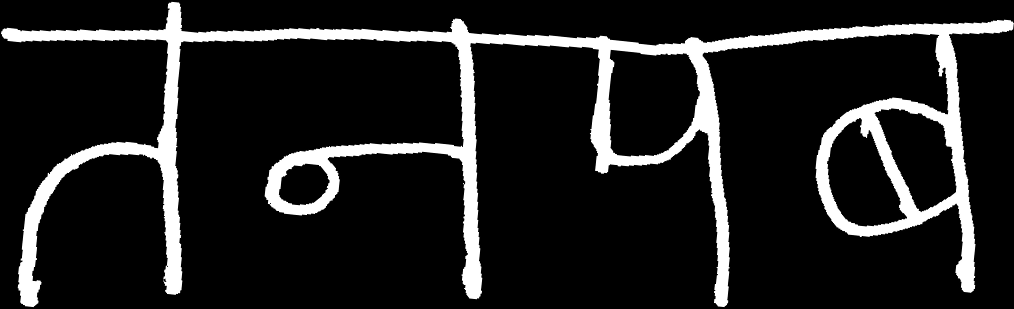

(309, 1014)
(243, 800)


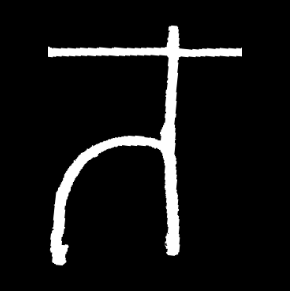

त


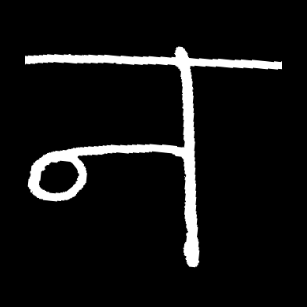

न


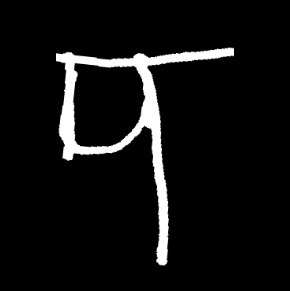

प


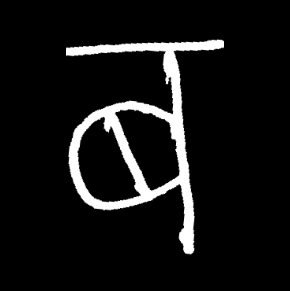

ब
तनपब


NameError: ignored

In [20]:
'''
This will be main file which the co-ordinaters of the event will be using to test your
code. This file contains two functions:

1. predict: You will be given an rgb image which you will use to predict the output 
which will be a string. For the prediction you can use/import code,models from other files or
libraries. More detailes given above the function defination.

2. test: This will be used by the co-ordinators to test your code by giving sample 
inputs to the 'predict' function mentioned above. A sample test function is given for your
reference but it is subject to minor changes during the evaluation. However, note that
there won't be any changes in the input format given to the predict function.

Make sure all the necessary functions etc. you import are done from the same directory. And in 
the final submission make sure you provide them also along with this script.
'''

# Essential libraries and your model can be imported here
import os
import cv2
import numpy as np 
import blues

'''
function: predict
input: image - A numpy array which is an rgb image
output: answer - A list which is the full word

Suggestion: Try to make your code understandable by including comments and organizing it. For 
this we encourgae you to write essential function in other files and import them here so that 
the final code is neat and not too big. Make sure you use the same input format and return 
same output format.
'''
def predict(image):
    #--------------------------ENTER THE LOCATION OF THE MODELS HERE----------------------------#
  model2=keras.models.load_model("/content/drive/MyDrive/mosaic_2/Ripped Jaws/model2_model.h5")
  model2.load_weights("/content/drive/MyDrive/mosaic_2/Ripped Jaws/model2_weights.hdf5")


  ans=list()
  

  if Contains_only_one_word==True:
    img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    characters=blues.segment(img)
    
    #we iterate through each character
    for character in characters:
      character = cv2.cvtColor(character , cv2.COLOR_GRAY2BGR)
      cv2_imshow(character)
      a=blues.preduct(character,model2)
      ans.append(a)
  else:
      # Image is Segmented into separate Words
      img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      words=blues.word_segment(img)
      #We  iterate through Each word
      for word in words:
        # Word is Segmented into separate Character
        characters=blues.segment(word)
        #we iterate through each character
        for character in characters:
          character = cv2.cvtColor(character , cv2.COLOR_GRAY2BGR)
          cv2_imshow(character)
          a=blues.preduct(character,model2)
          ans.append(a)
        ans.append(" ")

      
  
  
  #print(ans)
  return ans


'''
function: test
input: None
output: None

This is a sample test function which the co-ordinaors will use to test your code. This is
subject to change but the imput to predict function and the output expected from the predict
function will not change. 
You can use this to test your code before submission: Some details are given below:
image_paths : A list that will store the paths of all the images that will be tested.
correct_answers: A list that holds the correct answers
score : holds the total score. Keep in mind that scoring is subject to change during testing.

You can play with these variables and test before final submission.
'''
def test():
    '''
    We will be using a similar template to test your code
    '''

    image_paths = ['/content/WhatsApp Image 2021-04-12 at 10.45.22 PM.jpeg']
    #correct_answers = [list1,list2,listn]
    score = 0
    multiplication_factor=2 #depends on character set size

    for i,image_path in enumerate(image_paths):
        image = cv2.imread(image_path) # This input format wont change
        answer = predict(image) # a list is expected
        print(''.join(answer))# will be the output string

        n=0
        for j in range(len(answer)):
            if correct_answers[i][j] == answer[j]:
                n+=1
                
        if(n==len(correct_answers[i])):
            score += len(correct_answers[i])*multiplication_factor

        else:
            score += n*2
        
    
    print('The final score of the participant is',score)

#-------------------------Mark this False if your image contains multiple words------------------------------# 
Contains_only_one_word=True
#------------------------------------------------------------------------------------------------------------#

if __name__ == "__main__":
    test()